In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from  matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


In [7]:
import os
os.getcwd()

'C:\\Users\\tempt\\Desktop\\deeplearning_ai\\github'

In [17]:
#load dataset
train_dataset=h5py.File('datasets/train_happy.h5','r') # train_dataset.keys() contains --> ['list_classes', 'train_set_x', 'train_set_y']>
X_train_orig=np.array(train_dataset['train_set_x'][:]) # shape --> (600, 64, 64, 3)
Y_train_orig=np.array(train_dataset['train_set_y'][:]) # shape --> (600,)

test_dataset=h5py.File('datasets/test_happy.h5','r')
X_test_orig=np.array(test_dataset['test_set_x'][:]) # shape--> (150, 64, 64, 3)
Y_test_orig=np.array(test_dataset['test_set_y'][:])  # shape--> (150,)

classes=np.array(test_dataset['list_classes'][:])

# reshape Y
Y_train_orig=Y_train_orig.reshape((1,Y_train_orig.shape[0])) # file.reshape(())/ file.reshape()--> both works
Y_test_orig= Y_test_orig.reshape((1,Y_test_orig.shape[0]))


In [18]:
#Normalize
X_train=X_train_orig/255.
X_test= X_test_orig/255.

#Reshape
Y_train=Y_train_orig.T
Y_test=Y_test_orig.T

In [19]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


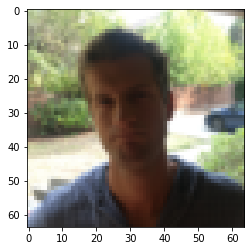

In [60]:
index=10
plt.imshow(X_train_orig[index]) #display sample training image

SEQUENTIAL API

Did you know? 
why batchnorm over axis=3?
#https://stackoverflow.com/questions/45799926/why-batch-normalization-over-channels-only-in-cnn

Batch Norm parameters-gamma, beta, mean , variance- multiply it with channels/last layer to get 
the number of parameters. out of 4, 2 are non trainable

Number of parameters in Conv2d :
=filter parameter x number of filters +bias
=(7x7x3)x32+32=4736

In [22]:
def happyModel():
    x=X_train.shape[1],X_train.shape[2],X_train.shape[3]
    
    model=tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=3,input_shape=x),
        tfl.Conv2D(32,(7,7),strides=1),
        tfl.BatchNormalization(axis=3), 
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(units=1, activation='sigmoid')
    ])
    return model

In [23]:
happy_model=happyModel()

In [24]:
happy_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

TRAIN/ EVALUATE THE MODEL

In [73]:
happy_model.fit(X_train,Y_train, epochs=10,batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 59ms/step - loss: 0.8077 - accuracy: 0.7817
Epoch 2/10
38/38 [==============================] - 2s 59ms/step - loss: 0.2936 - accuracy: 0.8783
Epoch 3/10
38/38 [==============================] - 2s 62ms/step - loss: 0.2151 - accuracy: 0.9167
Epoch 4/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1128 - accuracy: 0.9517
Epoch 5/10
38/38 [==============================] - 2s 59ms/step - loss: 0.0857 - accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 2s 56ms/step - loss: 0.1248 - accuracy: 0.9617
Epoch 7/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1732 - accuracy: 0.9350
Epoch 8/10
38/38 [==============================] - 2s 60ms/step - loss: 0.0901 - accuracy: 0.9733
Epoch 9/10
38/38 [==============================] - 2s 65ms/step - loss: 0.0896 - accuracy: 0.9650
Epoch 10/10
38/38 [==============================] - 2s 61ms/step - loss: 0.2139 - accuracy: 0.9350


In [68]:
happy_model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 37ms/step - loss: 0.1316 - accuracy: 0.9400


[0.131571963429451, 0.9399999976158142]